In [13]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [14]:
# Configuración de gráficos
plt.style.use('ggplot')
sns.set_palette('viridis')

In [15]:
# Cargar el dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [16]:
# --- 1. Análisis Exploratorio de Datos ---
# Visualización inicial
print("Primeras filas del dataset:")
print(df.head())
print("\nDescripción de los datos:")
print(df.describe())
print("\nInformación general:")
df.info()

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

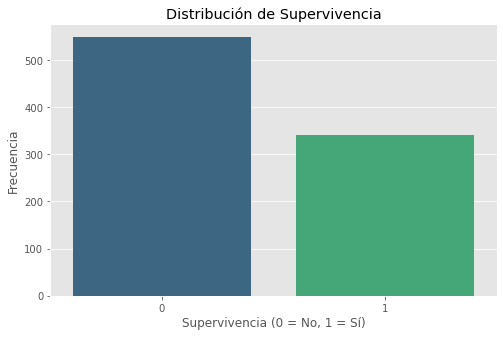

In [17]:
# Visualizar distribución de la variable objetivo
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', palette='viridis')
plt.title("Distribución de Supervivencia")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()

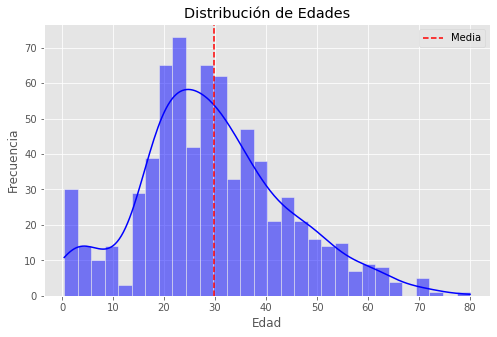

In [18]:
# Distribución de edades
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label='Media')
plt.legend()
plt.show()

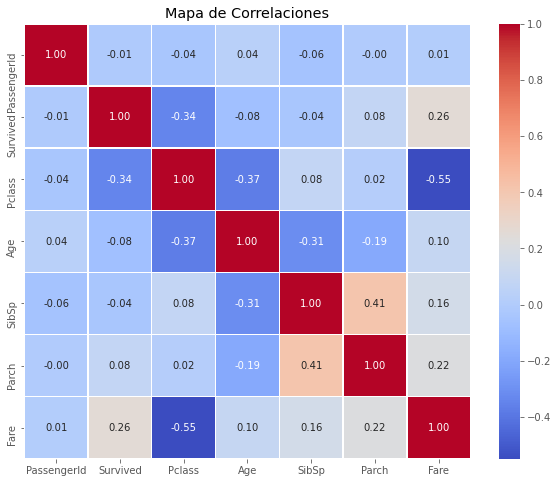

In [19]:
# Mapa de calor de correlaciones
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Correlaciones")
plt.show()

In [20]:
# --- 2. Preprocesamiento ---
# Tratar valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convertir columnas categóricas a variables dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Eliminar columnas irrelevantes
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [21]:
# --- 3. Selección de Características ---
# Variables seleccionadas para el modelo
X = df.drop('Survived', axis=1)  # Características
y = df['Survived']  # Variable objetivo

In [22]:
# --- 4. Dividir el Dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 712
Tamaño del conjunto de prueba: 179


In [23]:
# --- 5. Entrenamiento del Modelo ---
# Modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



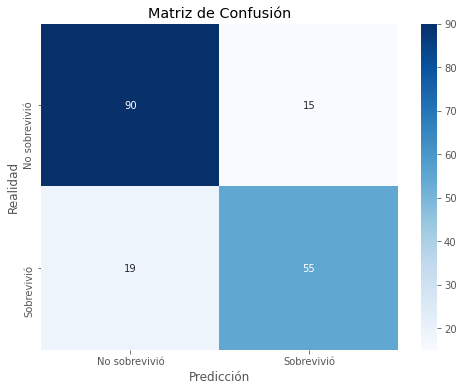

In [24]:
# --- 6. Evaluación del Modelo ---
# Predicciones
y_pred = model.predict(X_test)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'],
            yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()

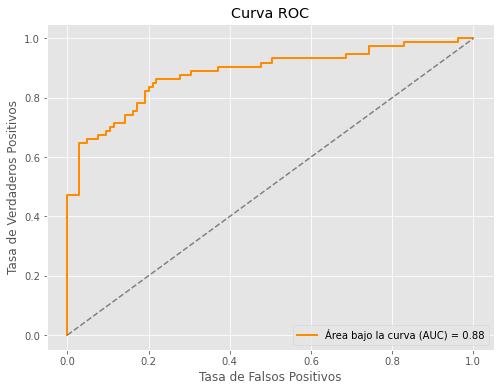

In [25]:
# --- 7. Visualización de Resultados ---
# Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Área bajo la curva (AUC) = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [26]:
# --- 8. Interpretación de Resultados ---
print(f"Área bajo la curva (AUC): {roc_auc:.2f}")


Área bajo la curva (AUC): 0.88
